# Sioux Falls

In [26]:
import os
from pprint import pp
import pandas as pd

import bcnetwork as bc

## Loading graph

In [2]:
data_dir = '../instances/sioux-falls/'
nodes_file = os.path.join(data_dir, 'nodes.csv')
arcs_file = os.path.join(data_dir, 'arcs.csv')
data_file = os.path.join(data_dir, 'data.dat')

model_cache = os.path.join(data_dir, '_bc_model.yaml')

In [9]:
if os.path.exists(model_cache):
    model = bc.model.Model.load(model_cache)
else:
    model = bc.model.RandomModel(
        name='Sioux-Falls',
        nodes_file=nodes_file,
        arcs_file=arcs_file,
        project_root='..',
    )
    model._generate_random_data()
    model.save(model_cache)

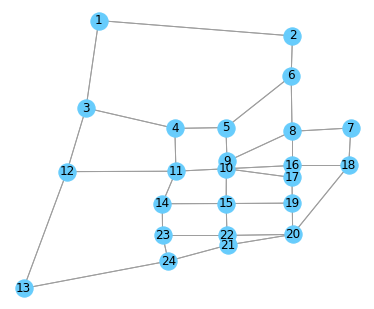

In [10]:
bc.draw.draw_graph(model.graph)

## Run models

### Running steps

- Generate data file
- Run solver
- Read solution

## Random instance generation in order to try detecting errors

In [40]:
from functools import partial
import traceback
import sys
import random

build_random_model = partial(
    bc.model.RandomModel,
    name='Sioux-Falls',
    nodes_file=nodes_file,
    arcs_file=arcs_file,
    project_root='..',
)

class ModelError(Exception):
    def __init__(self, model, solution, exception):
        self.model = model
        self.solution = solution
        self.exception = exception

def runner(model, model_name):
    solution = model.solve(model_name=model_name)
    try:
        errors = model.validate_solution(solution)
    except Exception as e:
        e.tb = traceback.format_exc()
        raise ModelError(model, solution, e)

    return dict(solution=solution, model_name=solution.model_name)


def solve_and_validate(model):
    model_names = ['', 'single_level_v2', 'single_level_v3', 'single_level_v4']
    ret = []

    model_runner = partial(runner, model)
#     with Pool(4) as pool:
#         pool.map(model_runner, model_names)

    return [model_runner(name) for name in model_names]


runs = []
model_errors = []
node_count = model.graph.number_of_nodes()

number_of_examples = 10

for i in range(number_of_examples):
    odpair_count = int(random.uniform(10, node_count))
    model = build_random_model(odpair_count=odpair_count)

    try:
        runs.append(solve_and_validate(model))
    except ModelError as e:
        model_errors.append(e)

17
5
15
5
17
5
19
5
15
5
21
5
19
5
15
5
10
5
10
5


In [17]:
error_runs = [r for runentry in runs for r in runentry if r.get('errors')]
print("Runs with errors:", error_runs)
print("RUns with exceptions: ", model_errors)

Runs with errors: []
RUns with exceptions:  []


## Model comparison

Compare models to decide if there's an optimal one.

In [36]:
def compare_runs(index, run_batch):
    """
    Compute stats for each run so they can be compared.
    Runs are assumed to correspond for the same exact model.
    
    """
    def exctract_data(run):
        s = run['solution']

        return {
            'demand_transfered': s.total_demand_transfered,
            'budget_used': s.budget_used,
            'model_name': s.model_name,
            'od_count': len(s.data.shortest_paths),
            'model': index,
        }
        
    return [exctract_data(run) for run in run_batch]


data = [d for index, run_batch in enumerate(runs) for d in compare_runs(index, run_batch)]

In [37]:
df = pd.DataFrame(data)

In [38]:
df

,demand_transfered,budget_used,model_name,od_count,model
0,926,30,default,5,0
1,926,28,single_level_v2,5,0
2,926,30,single_level_v3,5,0
3,926,28,single_level_v4,5,0
4,498,30,default,5,1
5,498,30,single_level_v2,5,1
6,498,30,single_level_v3,5,1
7,498,30,single_level_v4,5,1
8,1436,30,default,5,2
9,1436,30,single_level_v2,5,2


In [45]:
class Example:
    def __init__(self, kwarg=9, other='other'):
        self.kwarg = kwarg
        self.other = other
        print(kwarg, other)
        
example_builder = partial(Example, other='partial')

example_builder()
example_builder(kwarg=10)
example_builder(kwarg=11)
example_builder()

9 partial
10 partial
11 partial
9 partial
